In [22]:
flights_df = pd.read_csv('ny-flights.csv')
print(flights_df.head())
print("Dataset Information:")
print(flights_df.info())
print("Basic Statistics:")
print(flights_df.describe())
print("Missing Values:")
print(flights_df.isnull().sum())

               fl_date unique_carrier  airline_id tail_num  fl_num origin  \
0  2014-01-01 00:00:00             AA       19805   N338AA       1    JFK   
1  2014-01-01 00:00:00             AA       19805   N335AA       3    JFK   
2  2014-01-01 00:00:00             AA       19805   N327AA      21    JFK   
3  2014-01-01 00:00:00             AA       19805   N3EHAA      29    LGA   
4  2014-01-01 00:00:00             AA       19805   N319AA     117    JFK   

  dest  dep_time  dep_delay  arr_time  arr_delay  cancelled  \
0  LAX     914.0       14.0    1238.0       13.0        0.0   
1  LAX    1157.0       -3.0    1523.0       13.0        0.0   
2  LAX    1902.0        2.0    2224.0        9.0        0.0   
3  PBI     722.0       -8.0    1014.0      -26.0        0.0   
4  LAX    1347.0        2.0    1706.0        1.0        0.0   

                   arr                  dep  
0  2014-01-01 12:38:00  2014-01-01 09:14:00  
1  2014-01-01 15:23:00  2014-01-01 11:57:00  
2  2014-01-01 22:24:

Which airline has the highest on-time performance?
On-time performance by airline:
   unique_carrier   on_time  on_time_percentage
0              US  0.611531           61.153054
1              UA  0.574634           57.463415
2              VX  0.567474           56.747405
3              AA  0.548416           54.841589
4              FL  0.502674           50.267380
5              DL  0.484797           48.479682
6              EV  0.477723           47.772277
7              HA  0.448276           44.827586
8              MQ  0.429146           42.914573
9              B6  0.384669           38.466932
10             WN  0.355263           35.526316
11             F9  0.312500           31.250000
12             OO  0.200000           20.000000


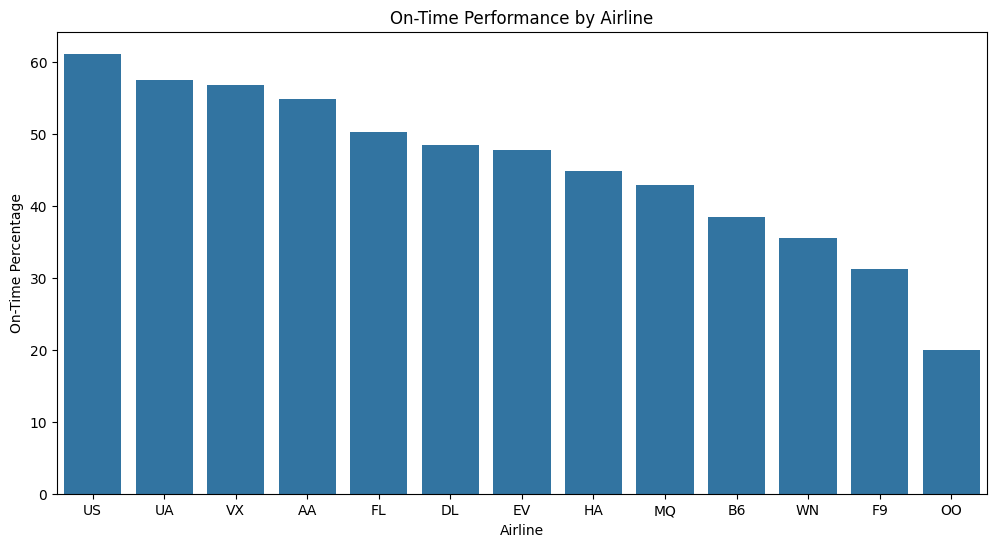

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Which airline has the highest on-time performance?")


non_cancelled = flights_df[flights_df['cancelled'] == 0].copy()


non_cancelled['on_time'] = non_cancelled['arr_delay'] <= 0


airline_performance = non_cancelled.groupby('unique_carrier')['on_time'].mean().sort_values(ascending=False).reset_index()
airline_performance['on_time_percentage'] = airline_performance['on_time'] * 100

print("\
On-time performance by airline:")
print(airline_performance)


plt.figure(figsize=(12, 6))
sns.barplot(x='unique_carrier', y='on_time_percentage', data=airline_performance)
plt.title('On-Time Performance by Airline')
plt.xlabel('Airline')
plt.ylabel('On-Time Percentage')
plt.show()


In [24]:
arrivals_count = flights_df['dest'].value_counts().reset_index()
arrivals_count.columns = ['destination', 'arrival_count']

max_arrivals = arrivals_count.iloc[0]

print("Airport with most arrivals:")
print(max_arrivals)

print("\
Top 10 airports by arrivals:")
print(arrivals_count.head(10))

Airport with most arrivals:
destination       ATL
arrival_count    1549
Name: 0, dtype: object
Top 10 airports by arrivals:
  destination  arrival_count
0         ATL           1549
1         ORD           1376
2         MCO           1243
3         FLL            986
4         CLT            967
5         LAX            921
6         MIA            852
7         BOS            755
8         SFO            715
9         PBI            659


Question: Airport with most number of arrivals?


<ipython-input-25-32383812a3f4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_3, x='destination', y='arrival_count', palette='viridis')


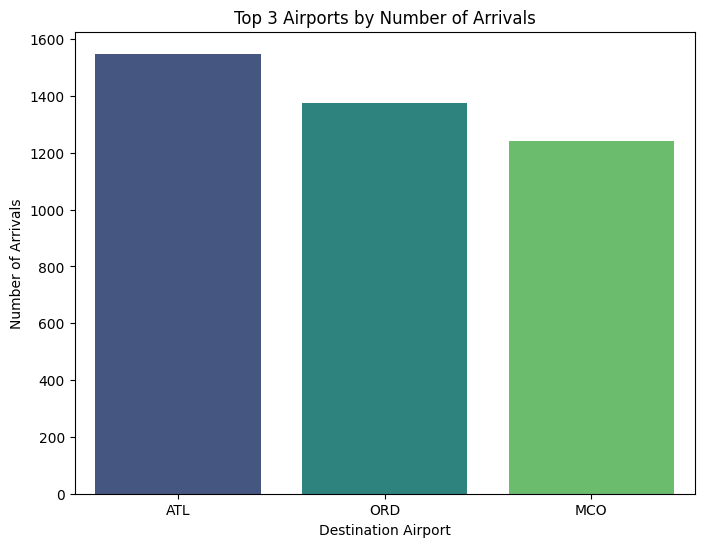

Plotted top 3 airports by number of arrivals


In [25]:
print('Question: Airport with most number of arrivals?')
top_3 = arrivals_count.head(3)


plt.figure(figsize=(8,6))
sns.barplot(data=top_3, x='destination', y='arrival_count', palette='viridis')
plt.title('Top 3 Airports by Number of Arrivals')
plt.xlabel('Destination Airport')
plt.ylabel('Number of Arrivals')
plt.show()

print('Plotted top 3 airports by number of arrivals')

<ipython-input-26-34bd6098e08f>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_3_departures, x='origin', y='departure_count', palette='viridis')


Top 3 airports by departures:
  origin  departure_count
0    LGA             8530
1    JFK             7878
2    BUF             1348


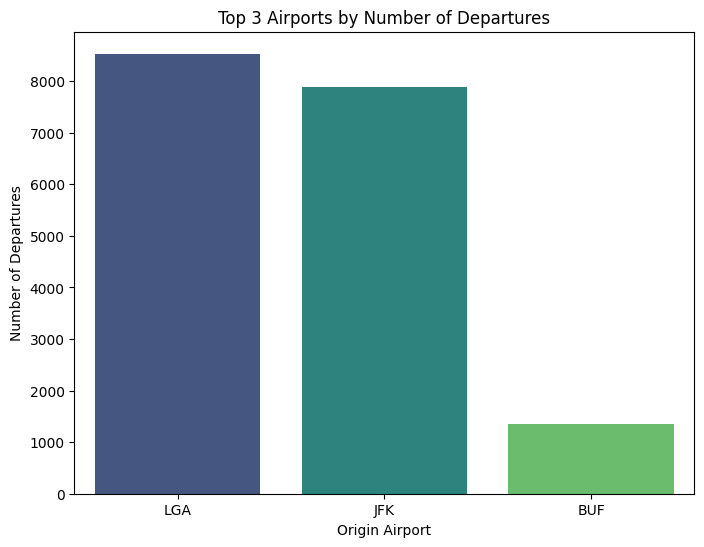

Plotted top 3 airports by number of departures


In [26]:

departures_count = flights_df['origin'].value_counts().reset_index()
departures_count.columns = ['origin', 'departure_count']


top_3_departures = departures_count.head(3)

print("Top 3 airports by departures:")
print(top_3_departures)

# Plot the top 3 departure airports
plt.figure(figsize=(8,6))
sns.barplot(data=top_3_departures, x='origin', y='departure_count', palette='viridis')
plt.title('Top 3 Airports by Number of Departures')
plt.xlabel('Origin Airport')
plt.ylabel('Number of Departures')
plt.show()

print('Plotted top 3 airports by number of departures')

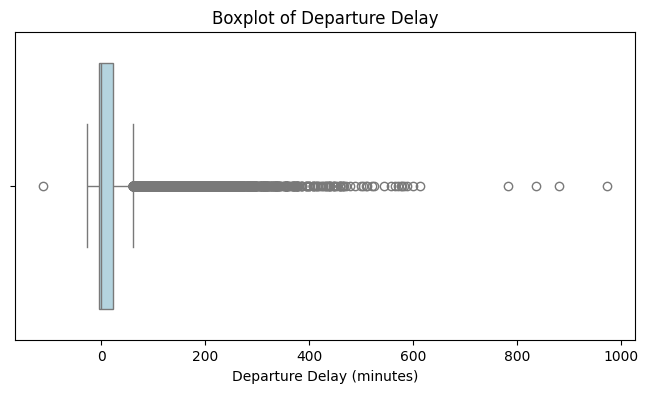

Plotted boxplot for departure delay to visualize outliers.


In [27]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=flights_df['dep_delay'], color='lightblue')
plt.title('Boxplot of Departure Delay')
plt.xlabel('Departure Delay (minutes)')
plt.show()

print('Plotted boxplot for departure delay to visualize outliers.')

Loaded flights_df from file
Basic statistical summary of numerical columns:
         airline_id        fl_num      dep_time     dep_delay      arr_time  \
count  20817.000000  20817.000000  18462.000000  18462.000000  18412.000000   
mean   20109.614882   1826.098813   1319.991713     22.772127   1493.698566   
std      370.715209   1548.188325    479.999940     59.766152    518.851657   
min    19393.000000      1.000000      1.000000   -112.000000      1.000000   
25%    19790.000000    472.000000    858.000000     -4.000000   1110.750000   
50%    20355.000000   1457.000000   1336.000000      0.000000   1519.000000   
75%    20409.000000   2701.000000   1720.000000     22.000000   1923.000000   
max    21171.000000   6258.000000   2400.000000    973.000000   2400.000000   

          arr_delay    cancelled  
count  18383.000000  20817.00000  
mean      21.380732      0.11505  
std       64.605591      0.31909  
min     -112.000000      0.00000  
25%      -12.000000      0.00000  
50

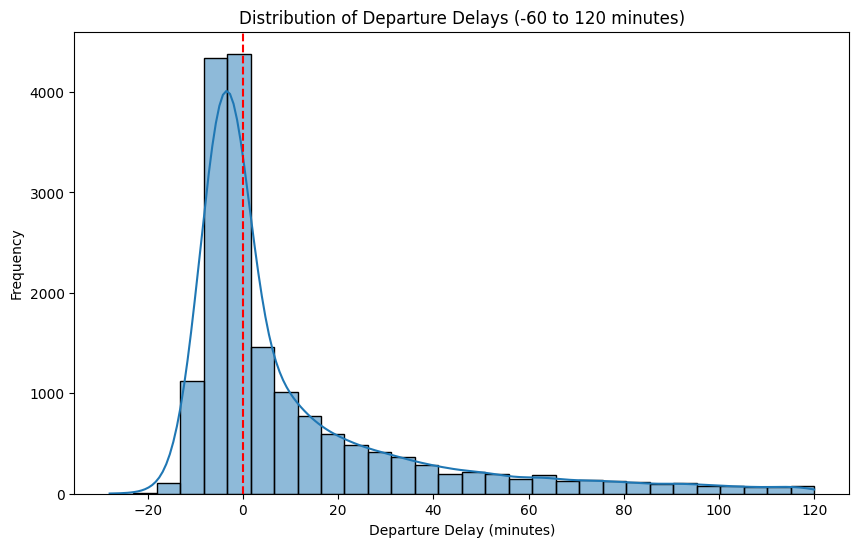

Completed first plot: Distribution of departure delays


In [28]:
# First, let's load the data if it's not already loaded
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

flights_df = pd.read_csv('ny-flights.csv')
print("Loaded flights_df from file")

# Basic statistical summary
print("\
Basic statistical summary of numerical columns:")
print(flights_df.describe())

# Count of flights by carrier
print("\
Number of flights by carrier:")
carrier_counts = flights_df['unique_carrier'].value_counts()
print(carrier_counts)

# Calculate cancellation rate
cancellation_rate = flights_df['cancelled'].mean() * 100
print(f"\
Overall cancellation rate: {cancellation_rate:.2f}%")

# Plot 1: Distribution of departure delays
plt.figure(figsize=(10, 6))
# Filter to remove extreme outliers for better visualization
filtered_delays = flights_df[flights_df['dep_delay'].between(-60, 120)]
sns.histplot(filtered_delays['dep_delay'], bins=30, kde=True)
plt.title('Distribution of Departure Delays (-60 to 120 minutes)')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Frequency')
plt.axvline(x=0, color='red', linestyle='--')
plt.show()

print("Completed first plot: Distribution of departure delays")